# What is Reddit?

Reddit is a community-determined aggregator of content. It is a social platform where users submit posts that other users 'upvote' or 'downvote' based on if they like it. If a post gets lots of upvotes it moves up the Reddit rankings so that more people can see it.

# Problem Statement:

In  social site Reddit  which contain memes posted by the user and tags. Here, our main aim to classify memes as dank (popular) or not and also analyze what makes memes popular.  We also analyze different attributes which make memes popular. In addition, we also analyze what incremental predictive power of Image and text-related attributes over each other.

# Business Problem :

On social sites, memes are not the only source of humor but also draw attention to particular information, social messages, problems, advertisement, and opinions. 

 In digital marketing, memes are very useful and many company shares and interesting memes to entertain users and attract new users so we need to identify which memes will most like by users .




# Business objectives and constraints:

No low-latency requirement.

Probability of prediction is useful to recommend highest probability memes

# What is an evaluation matrix?

Here, both classes are equally important so we can use f1-score and AUC as our evaluation matrix.


# DATA OVERVIEW


reference : https://arxiv.org/pdf/2011.14326.pdf  
source    : https://github.com/dimaTrinh/dank_data/tree/master/data


*   Training folder : 3264  memes
*   Validation folder :1616 memes
*   Test folder: 1858 memes
*   final_dank : this file contain information about memes








  






---






Some of the important features in final_dank file:






*    
created utc     	  = time when the meme is posted
*   ups             =number of upvotes for each meme
*   title                    	=tag with post

*   subscribers     = number of subscriber to each subreddit
*   dank_level      = posts
with a normalized upvotes value in the top 5% of all posts was classified as dank
(positive label, 1), and the rest were classified as not dank (negative label, 0)


*  ups_normed    =we normalized the number of upvotes by dividing by
the number of subscribers from the respective subreddit where it was posted. 














In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.image as img
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
pd.set_option('display.max_columns',500)

Example of few memes

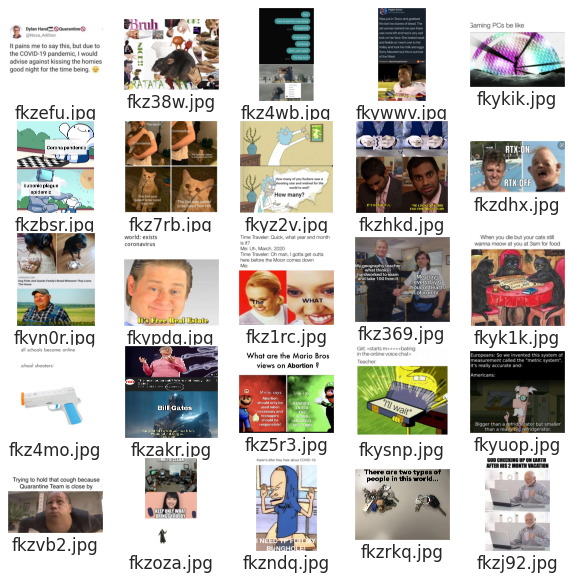

In [ ]:
# plot few memes
sample_images=os.listdir('/content/drive/MyDrive/Meme/data/training')
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img.imread('/content/drive/MyDrive/Meme/data/training/'+sample_images[i]), cmap=plt.cm.binary)
    plt.xlabel(sample_images[i])


#  Exploratory Data Analysis

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#load data
data=pd.read_csv('/content/drive/MyDrive/Meme/data/data.csv')
data=data.drop_duplicates(subset=['id'])
data.dropna(subset=['datetime_temp'],inplace=True)
print('shape of input data in source=',data.shape)

shape of input data in source= (67243, 18)


In [ ]:
data.isnull().sum()

index                   0
created_utc             0
downs                   0
id                      0
is_nsfw                 0
media                   0
subreddit               0
subscribers             0
thumbnail.height       38
thumbnail.thumbnail     0
thumbnail.width        38
title                   0
ups                     0
url                     0
datetime_temp           0
time_of_day             0
ups_normed              0
dank_level              0
dtype: int64

Analysis with time_of_day

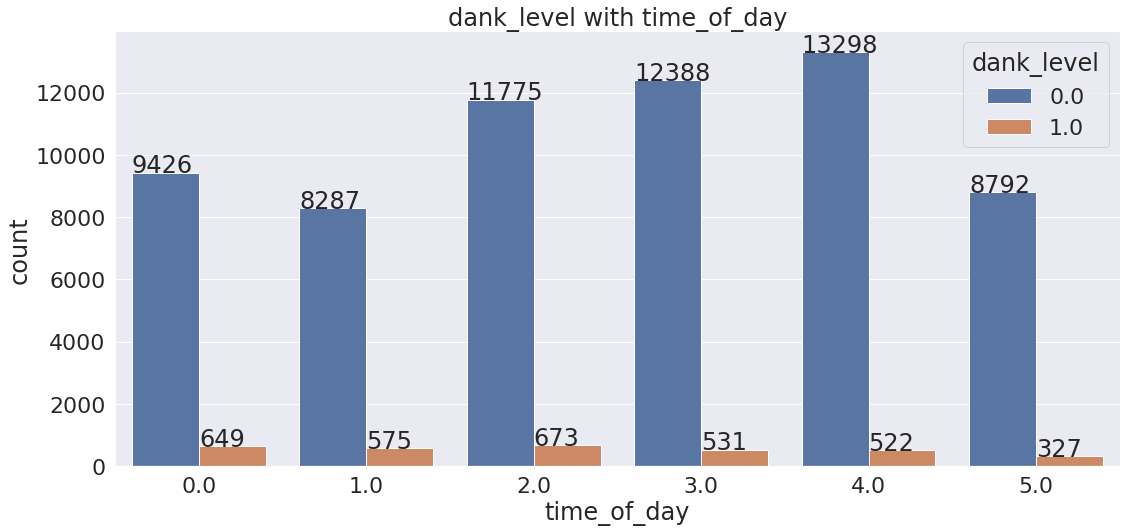

In [ ]:
sns.set(font_scale=2)
plt.figure(figsize=(18,8))
ax = sns.countplot(x='time_of_day',data=data,hue='dank_level')
plt.title('dank_level with time_of_day')
for p in ax.patches:
        #for put value on countplot graph,In the simplest form, the text is placed at xy.
        ax.annotate(p.get_height(), (p.get_x(), p.get_height()+5))
plt.show()

observation: 

(i)On day 4 there is high number of memes were posted while on day 1 less number of memes were posted.

(ii) on day 2  memes were more viral .



# Analysis on  day which has high probability to meme go viral

In [ ]:
dank_ratio_day=data.groupby(['time_of_day'])['dank_level'].mean().to_frame("ratio").reset_index()
dank_ratio_day.sort_values(by='ratio', ascending=False,inplace=True)
dank_ratio_day['ratio']=dank_ratio_day['ratio']*100
dank_ratio_day.head()

,time_of_day,ratio
1,1.0,6.488377
0,0.0,6.441687
2,2.0,5.406491
3,3.0,4.110225
4,4.0,3.777135


observation: On day 1 and 0 there is high probability of meme go viral compare to other days.

# Analysis on datetime_temp

In [ ]:
data['hour']=data['datetime_temp'].apply(lambda x:int(x.split(" ")[1][:2]))

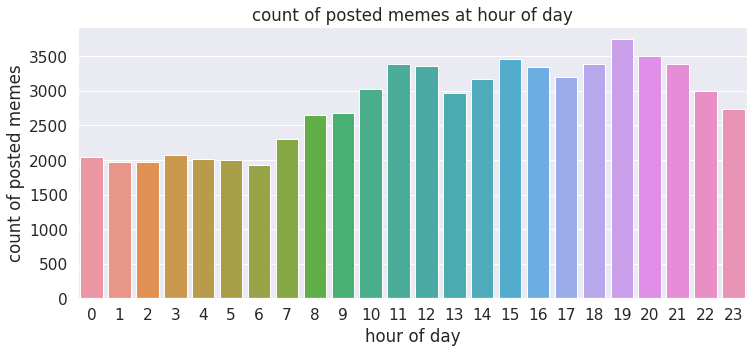

In [ ]:
sns.set(font_scale =1.4)
plt.figure(figsize=(12,5))
ax=sns.countplot(x='hour',data=data)
plt.xlabel('hour of day')
plt.ylabel("count of posted memes")
plt.title("count of posted memes at hour of day")
plt.show()


Observation: As we can see from plot during noon to night duration high number of memes were posted.

In [ ]:
dank_ratio_hour=data.groupby(['hour'])['dank_level'].mean().to_frame("dank_ratio").reset_index()
dank_ratio_hour.sort_values(by='dank_ratio', ascending=False,inplace=True)
dank_ratio_hour['dank_ratio']=dank_ratio_hour['dank_ratio']*100
dank_ratio_hour

,hour,dank_ratio
3,3,7.789066
5,5,7.171515
4,4,6.930693
7,7,6.875544
6,6,6.805195
2,2,6.636272
9,9,6.368715
10,10,5.971627
1,1,5.888325
8,8,5.406427


Observation: During mid-night to till noon  there is high dank_ratio  because in this hour very less meme are posted.

# Bivariate  Analysis with day and hour

In [ ]:
data.columns

Index(['index', 'created_utc', 'downs', 'id', 'is_nsfw', 'media', 'subreddit',
       'subscribers', 'thumbnail.height', 'thumbnail.thumbnail',
       'thumbnail.width', 'title', 'ups', 'url', 'datetime_temp',
       'time_of_day', 'ups_normed', 'dank_level', 'hour'],
      dtype='object')

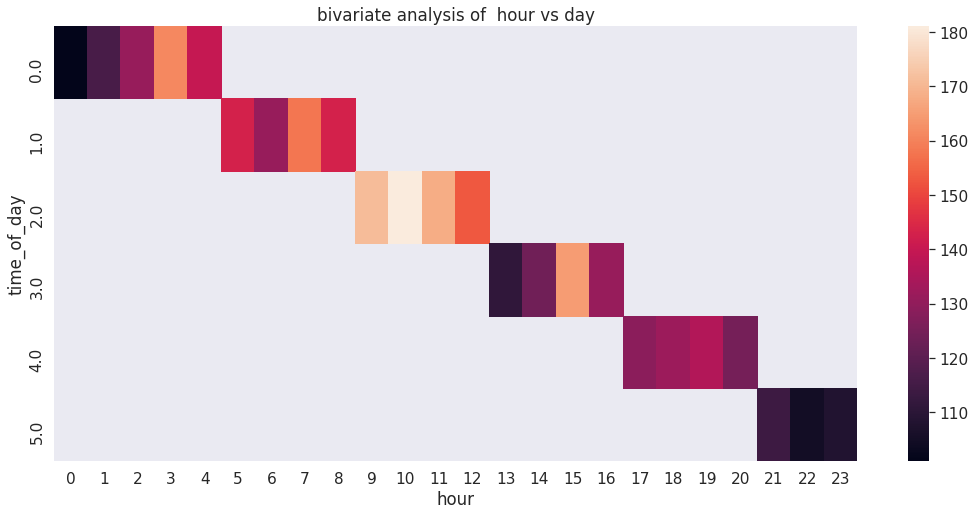

In [ ]:
result = pd.pivot_table(data=data, index='time_of_day', columns='hour',values='dank_level',aggfunc=np.sum)
#print(result)
plt.figure(figsize=(18,8))
plt.title("bivariate analysis of  hour vs day")
sns.heatmap(result)
plt.show()

Observation: As we can see here is an interesting pattern  on day 0 memes were posted in between o to 4 hours .On day 1 memes were posted in between 4 to 8 hours. On day 3 memes were posted from 8 hours to 12 hours .Day 3 memes were posted from 12 to 16 hours. Day 4 memes were posted from 16 to 20 hours.on day 5 memes were posted from 20 to 23 hours.

# Analysis on is_nsfw :

indicates if only suitable for 18+


In [ ]:
data['is_nsfw'].value_counts()

False    67028
True       215
Name: is_nsfw, dtype: int64

In [ ]:
dank_ratio_is_nsfw=data.groupby(['is_nsfw'])['dank_level'].mean().to_frame("dank_ratio").reset_index()
dank_ratio_is_nsfw.sort_values(by='dank_ratio', ascending=False,inplace=True)
dank_ratio_is_nsfw['dank_ratio']=dank_ratio_is_nsfw['dank_ratio']*100
dank_ratio_is_nsfw

,is_nsfw,dank_ratio
0,False,4.889002
1,True,0.000000


Observation: Majority of memes are suitable for all age while  some memes which  are only suitable  for 18+ do not viral .

[]

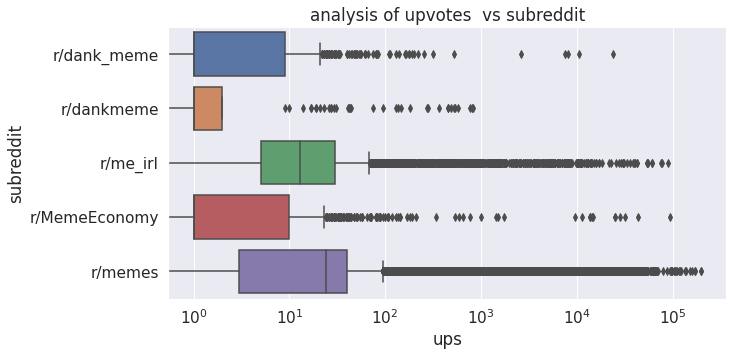

In [ ]:
plt.figure(figsize=(10,5))
plt.xscale(value= "log")
ax = sns.boxplot(y="subreddit", x="ups", data=data)
plt.title("analysis of upvotes  vs subreddit")
plt.plot()

observation: subreddit r/memes received highest upvotes while r/dankmeme receive less upvotes.

# Analysis on thumbnail.height

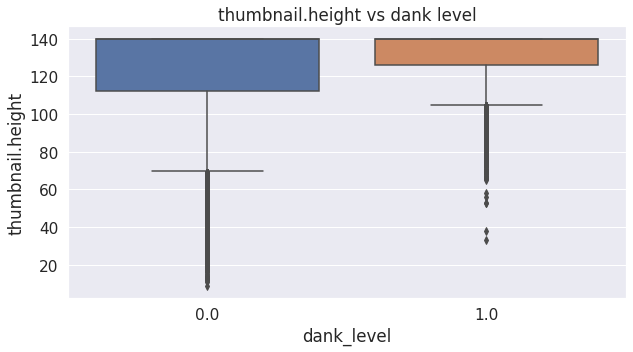

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='dank_level',y='thumbnail.height' , data=data)
plt.title("thumbnail.height vs dank level")
plt.show()

Observation: For dank meme thumbnail.height median value is very high around 105 while for not dank memes median value is around 70.

# Analysis on thumbnail.width 

In [ ]:
data[data.dank_level==0]['thumbnail.width'].value_counts()

140.0    63916
70.0        12
Name: thumbnail.width, dtype: int64

In [ ]:
data[data.dank_level==1]['thumbnail.width'].value_counts()

140.0    3277
Name: thumbnail.width, dtype: int64

Obsevation : For dank meme thumbnail.width is 140 while for not dank memes only 12 memes thumbnail.width are 70 and 38 are null.

# Analysis on title of post

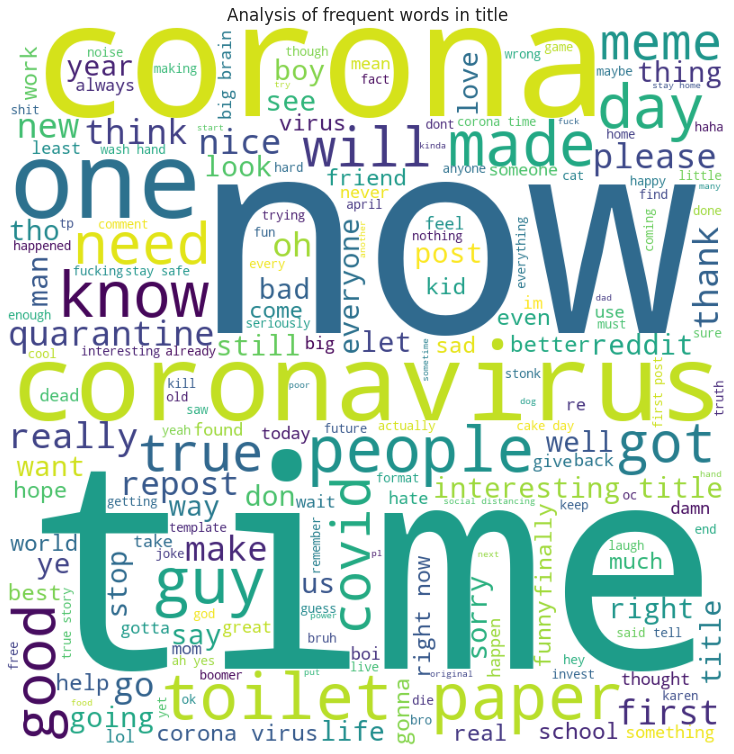

In [ ]:
# reference:https://www.geeksforgeeks.org/generating-word-cloud-python/
comment_words = ''
stopwords = set(STOPWORDS)
# remove word 'irl','me_irl','meme'
my_list=['irl','me_irl','meme']
stopwords.update(my_list)

# iterate through the csv file
for val in data.title:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    tokens=[w for w in tokens if len(w)>=2] 
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (12, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Analysis of frequent words in title")  
plt.show()


Observation: Most frequent words are in titels are 'coronavirus','time','corona','now','toilet'.

# Analysis on top_words in dank meme post

In [ ]:
dank_data=data[data.dank_level==1]

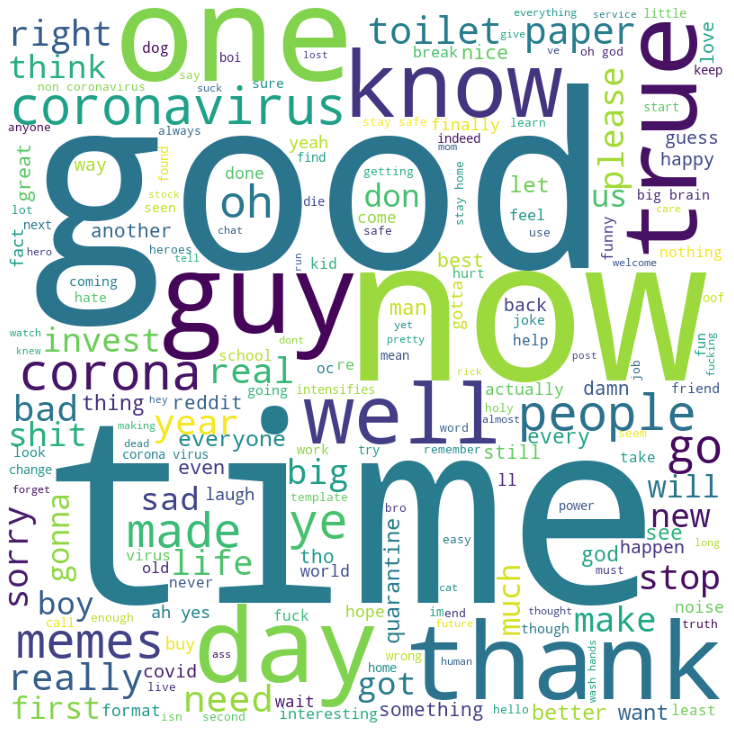

In [ ]:
# reference:https://www.geeksforgeeks.org/generating-word-cloud-python/
top_words = ''

# iterate through the csv file
for val in dank_data.title:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    tokens=[w for w in tokens if len(w)>=2] 
    top_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(top_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (12, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


Observation: In dank meme most frequent words are 'good','time','coronavirus','know','thank'.

Summary: 
1. On day 4 there is high number of memes were posted while on day 1 less number of memes were posted.On day 1 and 0 there is high probability of meme go viral compare to other days.

2. During noon to midnight duration high number of memes were posted.
3. During midnight to till early morning dank_ratio is very high because in these hours less memes were posted.
4. For dank meme thumbnail.height median value is very high around 105 while for not dank memes median value is around 70.
